In [2]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
import pytesseract
from IPython.core.display import HTML

%matplotlib inline

def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()
    
    
DIR = './vision/'

# Web 모니터링

- https://www.chartjs.org/

In [13]:
%%writefile server.py

import cv2
import numpy as np
import datetime
from flask import Flask, request, render_template, redirect
import requests

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요!!!!</h1>
    """
    return html
    
datas = [45.7,45,10,70.8]    
@app.route('/signal')
def signal():
    global datas
    datas.append(float(request.args.get("data")))
    
    return str(datas)


@app.route('/view')
def view():
    global datas
    
    labels = [i+1 for i in range(len(datas))]
    
    ctx = {"title":"그래프^^",
           "labels":labels,
           "data":datas,
          }
    
    
    return render_template('view.html', ctx=ctx)
   

    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [15]:
import requests
datas = [7.5,6.7,0.5,3.4]

for data in datas:
    response = requests.get("http://localhost:8000/signal?data="+str(data))
    print(response.text)

[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5]
[45.7, 45, 10, 70.8, 7.5, 6.7, 0.5, 3.4, 7.5, 6.7, 0.5, 3.4]


# 객체 검출

## 템플릿 매칭

In [34]:
img = cv2.imread(DIR + 'circuit.bmp', cv2.IMREAD_COLOR)
templ = cv2.imread(DIR + 'crystal.bmp', cv2.IMREAD_COLOR)

img = img +(50,50,50)

noise = np.zeros(img.shape, np.int32)
cv2.randn(noise, 0 ,10)
img = cv2.add(img, noise, dtype = cv2.CV_8UC3)

res = cv2.matchTemplate(img, templ, cv2.TM_CCOEFF_NORMED)
res_norm = cv2.normalize(res, None, 0,255,cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxloc = cv2.minMaxLoc(res)
print('maxv:', maxv)

(th,tw) = templ.shape[:2]
cv2.rectangle(img, maxloc, (maxloc[0]+ tw, maxloc[1]+th), (0,0,255),2)

cv2.imshow('templ',templ)
cv2.imshow('res_norm',res_norm)
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

maxv: 0.9884670376777649


In [18]:
img = cv2.imread(DIR + 'circuit.bmp', cv2.IMREAD_COLOR)
templ = cv2.imread(DIR + 'crystal.bmp', cv2.IMREAD_COLOR)

img = img +(50,50,50)

noise = np.zeros(img.shape, np.int32)
cv2.randn(noise, 0 ,10)
img = cv2.add(img, noise, dtype = cv2.CV_8UC3)

res = cv2.matchTemplate(img, templ, cv2.TM_SQDIFF_NORMED)
res_norm = cv2.normalize(res, None, 0,255,cv2.NORM_MINMAX, cv2.CV_8U)

minv, _, minloc, _ = cv2.minMaxLoc(res)
print('minv:', minv)

(th,tw) = templ.shape[:2]
cv2.rectangle(img, minloc, (minloc[0]+ tw, minloc[1]+th), (0,0,255),2)

cv2.imshow('templ',templ)
cv2.imshow('res_norm',res_norm)
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

minv: 0.14198367297649384


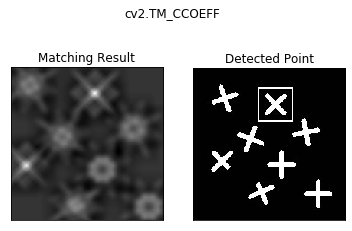

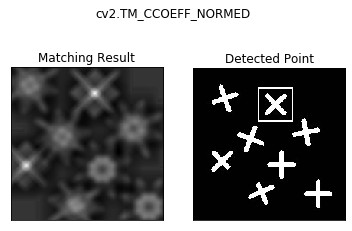

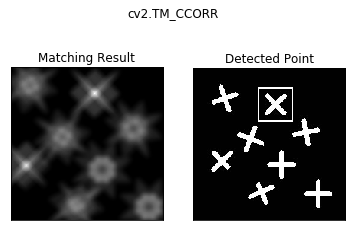

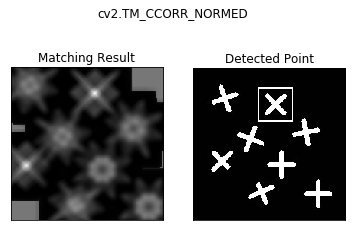

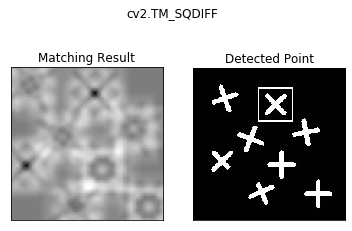

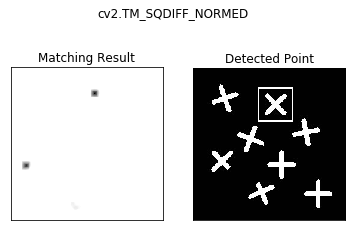

In [21]:
img = cv2.imread(DIR + 'cross.jpg',0)
img2 = img.copy()
template = cv2.imread(DIR + 'template.jpg',0)
w, h = template.shape[::-1]



methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)


   
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc



    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)


    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [23]:
img_rgb = cv2.imread(DIR + 'input2.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
templ = cv2.imread(DIR + 'template2.jpg',0)

w, h = templ.shape[::-1]

res = cv2.matchTemplate(img_gray, templ, cv2.TM_CCOEFF_NORMED)

threshold = 0.9
loc = np.where(res >= threshold)

In [24]:
print(loc)

(array([397, 397, 397, 398, 398, 398, 398, 398, 399, 399, 399, 399, 399,
       399, 400, 400, 400, 400, 400, 400, 400, 401, 401, 401, 401, 401,
       401, 402, 402, 402, 402, 402, 403, 403, 403], dtype=int64), array([303, 304, 305, 302, 303, 304, 305, 306, 301, 302, 303, 304, 305,
       306, 301, 302, 303, 304, 305, 306, 307, 302, 303, 304, 305, 306,
       307, 302, 303, 304, 305, 306, 303, 304, 305], dtype=int64))


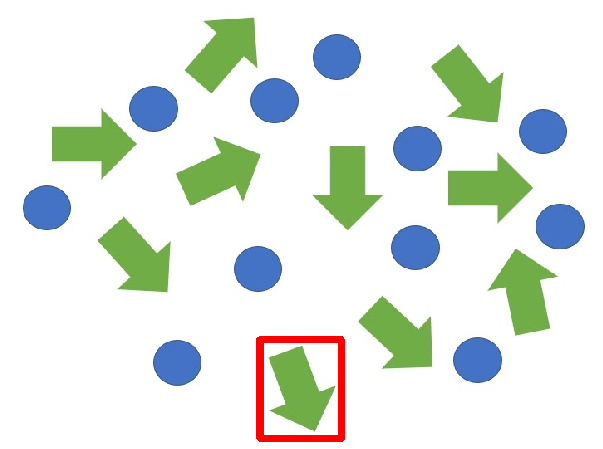

In [30]:
for pt in zip(*loc[::-1]): # loc의 x좌표, y좌표를 하나로 묶음
#     print(pt)
    cv2.rectangle(img_rgb, pt,(pt[0]+w,pt[1]+h), (0,0,255),2 )

imshow('', img_rgb)

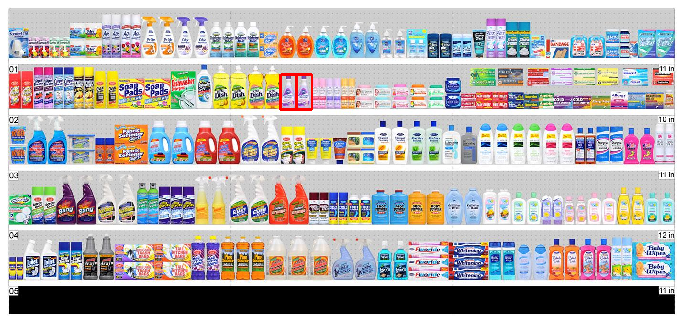

In [32]:
img_rgb = cv2.imread(DIR + 'input4.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
templ = cv2.imread(DIR + 'template4.png',0)

w, h = templ.shape[::-1]

res = cv2.matchTemplate(img_gray, templ, cv2.TM_CCOEFF_NORMED)

threshold = 0.7
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]): 
#     print(pt)
    cv2.rectangle(img_rgb, pt,(pt[0]+w,pt[1]+h), (0,0,255),2 )

imshow('', img_rgb)

In [36]:
a =[[1,2,3],
   [4,5,6]]

In [39]:
for v in a:
    print(v)
    print(v[0])

[1, 2, 3]
1
[4, 5, 6]
4


In [40]:
for v in zip(a):
    print(v)
    print(v[0])

([1, 2, 3],)
[1, 2, 3]
([4, 5, 6],)
[4, 5, 6]


In [42]:
# *: 언팩 기능
for v in zip(*a): # zip(a[0,:], a[1,:])
    print(v)
    print(v[0])

(1, 4)
1
(2, 5)
2
(3, 6)
3


In [43]:
def fun(a,b,c):
    print(a,b,c)
    
fun(1,4,5)
fun(*[1,4,5])

1 4 5
1 4 5


(array([55, 55, 56], dtype=int64), array([980, 981, 980], dtype=int64))


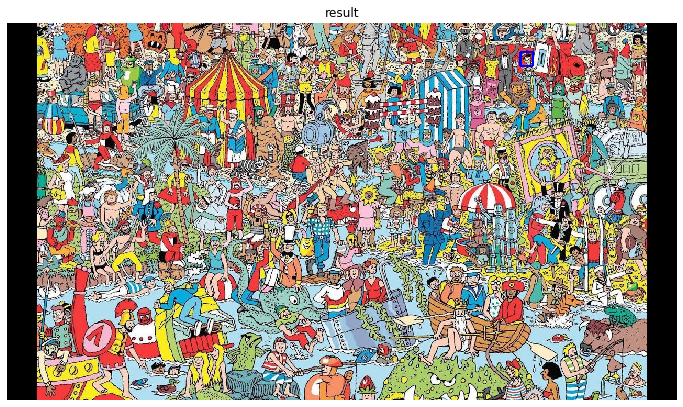

In [45]:
img_rgb = cv2.imread(DIR + 'find_waldo.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(DIR + 'waldo.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)

imshow('result', img_rgb)

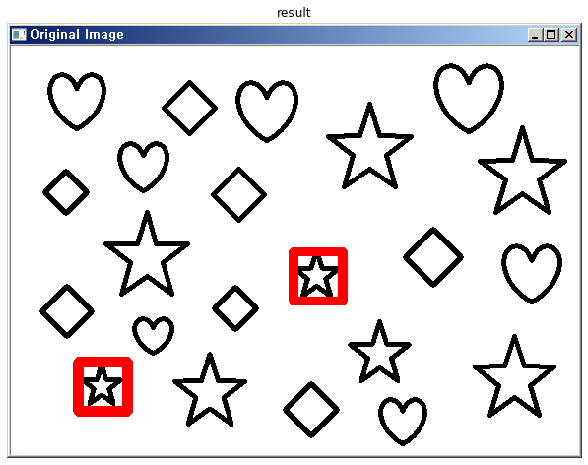

In [47]:
img_rgb = cv2.imread(DIR + 'input3.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(DIR + 'template_s.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.4
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

imshow('result', img_rgb)

## 얼굴 검출

In [50]:
src = cv2.imread(DIR + 'kids.png')

classifier = cv2.CascadeClassifier(DIR + 'haarcascade_frontalface_default.xml')
faces = classifier.detectMultiScale(src)
print(faces)

[[504 145 126 126]
 [113 158 112 112]]


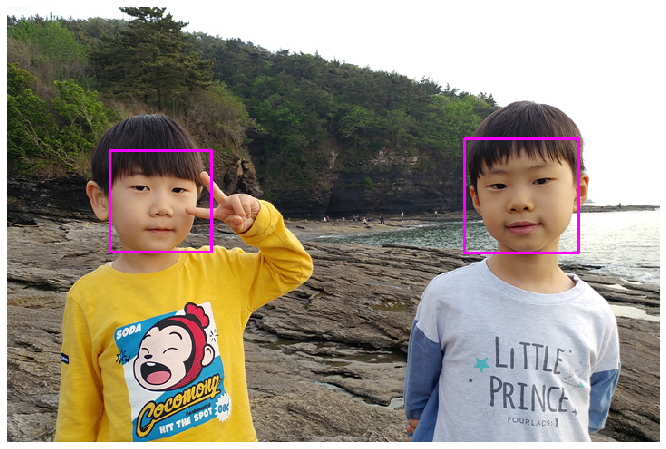

In [51]:
for (x,y,w,h) in faces:
    cv2.rectangle(src, (x,y), (x+w,y+h),(255,0,255),2)
imshow("", src)

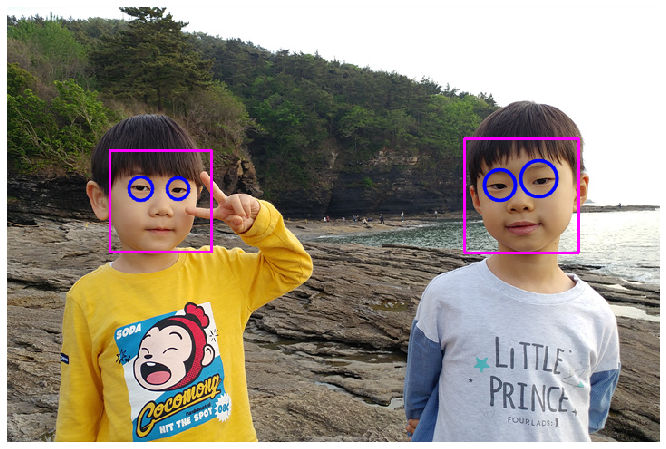

In [4]:
src = cv2.imread(DIR + 'kids.png')

face_classifier = cv2.CascadeClassifier(DIR + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(DIR + 'haarcascade_eye.xml')
faces = face_classifier.detectMultiScale(src)

for (x1,y1,w1,h1) in faces:
    cv2.rectangle(src, (x1,y1), (x1+w1,y1+h1),(255,0,255),2)
    faceROI = src[y1:y1+h1, x1:x1+w1]
    eyes = eye_classifier.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
        center = (int(x2+w2/2), int(y2+h2/2))
        cv2.circle(faceROI, center, int(w2/2),(255,0,0), 2, cv2.LINE_AA)
imshow("",src)

In [5]:
cap = cv2.VideoCapture(0)
      
        
face_classifier = cv2.CascadeClassifier(DIR + 'haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier(DIR + 'haarcascade_eye.xml')

while(1):
    ret, frame = cap.read()
    if not ret: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    
    for (x1,y1,w1,h1) in faces:
        cv2.rectangle(frame, (x1,y1), (x1+w1,y1+h1),(255,0,255),2)
        faceROI = frame[y1:y1+h1, x1:x1+w1]
        eyes = eye_classifier.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            center = (int(x1+x2+w2/2), int(x2+y2+h2/2))
            cv2.circle(faceROI, center, int(w2/2),(255,0,0), 2, cv2.LINE_AA)
        
    cv2.imshow("face", frame )
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
        

### 스마트폰에서 파일 올리고 이미지 인식하기

In [4]:
%%writefile server.py

import cv2
import numpy as np
import datetime
from flask import Flask, request, render_template, redirect, make_response
import requests


app = Flask(__name__)

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

@app.route('/')
def index():
    
    return render_template('face.html')
     
@app.route('/upload', methods=["POST"])
def upload():
    
    f = request.files['file1']
    filename = "./static/" + f.filename
    f.save(filename)
    
    img = cv2.imread(filename)
    img = cv2.resize(img, dsize=(0,0), fx=0.25, fy=0.25)
    
    
    faces = face_classifier.detectMultiScale(img)
    for (x1,y1,w1,h1) in faces:
        cv2.rectangle(img, (x1,y1), (x1+w1,y1+h1),(255,0,255),2)
        faceROI = img[y1:y1+h1, x1:x1+w1]
        eyes = eye_classifier.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            center = (int(x2+w2/2), int(y2+h2/2))
            cv2.circle(faceROI, center, int(w2/2),(255,0,0), 2, cv2.LINE_AA)
    
    
    retval, buffer = cv2.imencode('.jpg', img)
    
    response = make_response(buffer.tobytes())
    response.headers['Content-Type'] = 'image/jpg'
    
    return response
   
    
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


## QR코드 검출

In [19]:
detector = cv2.QRCodeDetector()

frame = cv2.imread(DIR + 'acronet.png')
info, points, _ = detector.detectAndDecode(frame)

print(info)
print(points.shape)
print(points)

http://www.acronet.kr/24987
(1, 4, 2)
[[[200.      200.     ]
  [858.97565 200.     ]
  [867.      859.     ]
  [200.      859.     ]]]


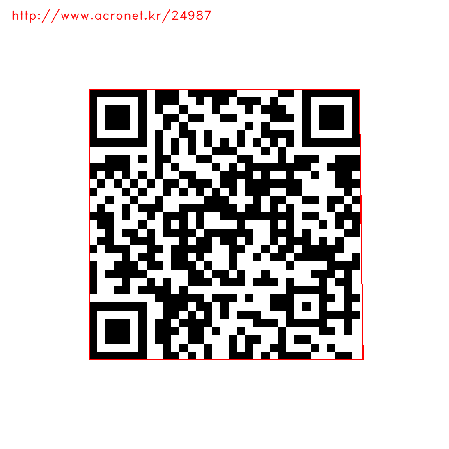

In [20]:
points = np.array(points, dtype=np.int32).reshape(4, 2)
cv2.polylines(frame, [points], True, (0, 0, 255), 2)


cv2.putText(frame, info, (10, 30), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255), lineType=cv2.LINE_AA)

imshow("", frame)

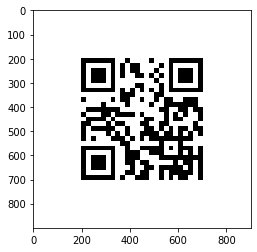

In [15]:
import qrcode
qr = qrcode.QRCode(version=2, box_size=20, border = 10)

url = 'http://192.168.1.54:8000'
qr.add_data(url)

qr.make()

img=qr.make_image(fill_color = 'black', back_color = 'white')

plt.imshow(img, cmap='gray')
img.save('myurl.png')

In [16]:
from pyzbar.pyzbar import decode
from PIL import Image

image = cv2.imread('myurl.png')
code = decode(image)
print(code)

[Decoded(data=b'http://192.168.1.54:8000', type='QRCODE', rect=Rect(left=204, top=204, width=494, height=494), polygon=[Point(x=204, y=204), Point(x=204, y=695), Point(x=698, y=698), Point(x=695, y=204)])]


[INFO] Found QRCODE barcode: http://192.168.1.54:8000


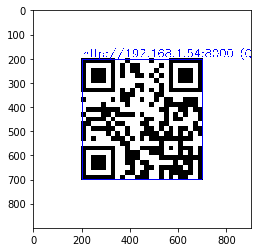

In [9]:
for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2)
 
    # print the barcode type and data to the terminal
    print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
cv2.imwrite("out.png", image)
plt.imshow(image, cmap="gray")

### 스마트 폰으로 qr코드 인식

In [21]:
%%writefile server.py

import cv2
import numpy as np
import datetime
from pyzbar.pyzbar import decode
from flask import Flask, request, render_template, redirect, make_response
import requests


app = Flask(__name__)

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

@app.route('/')
def index():
    
    return render_template('face.html')
     
@app.route('/upload', methods=["POST"])
def upload():
    
    f = request.files['file1']
    filename = "./static/" + f.filename
    f.save(filename)
    
    img = cv2.imread(filename)
#     img = cv2.resize(img, dsize=(0,0), fx=0.25, fy=0.25)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)
    
    if len(faces) > 0:
        for (x1,y1,w1,h1) in faces:
            cv2.rectangle(img, (x1,y1), (x1+w1,y1+h1),(255,0,255),2)
            faceROI = img[y1:y1+h1, x1:x1+w1]
            eyes = eye_classifier.detectMultiScale(faceROI)
            for (x2,y2,w2,h2) in eyes:
                center = (int(x2+w2/2), int(y2+h2/2))
                cv2.circle(faceROI, center, int(w2/2),(255,0,0), 2, cv2.LINE_AA)


        retval, buffer = cv2.imencode('.jpg', img)

        response = make_response(buffer.tobytes())
        response.headers['Content-Type'] = 'image/jpg'

        return response
   
    code = decode(img)
    url = code[0].data.decode('utf-8') 
    
    return f"<a href={url}>QR코드가기</a>" 

    #return f"<script>alert('이동합니다.'); window.location.href='{url}'; </script>"

def gen():
    while True:
        read_return_code, frame = vc.read()
        encode_return_code, image_buffer = cv2.imencode('.jpg', frame)
        io_buf = io.BytesIO(image_buffer)
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + io_buf.read() + b'\r\n')


@app.route('/video_feed')
def video_feed():
    """Video streaming route. Put this in the src attribute of an img tag."""
    return Response(
        gen(),
        mimetype='multipart/x-mixed-replace; boundary=frame'
    )

@app.route('/test')
def test():
    return  "<h1>동영상 테스트</h1> <img src=/video_feed width=320 height=240>"    
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py
